# Ch8: Optimization for Training Deep Models

Source: Straka's course-page and github https://github.com/ufal/npfl114/tree/master/slides/02 http://ufal.mff.cuni.cz/courses/npfl114/1819-summer#home

Chapter 8 of the book: Deep learning, Goodfellow (2017)

#### Key of the optimization: finding the **parameters θ** of a neural network that significantly reduce a **cost function J(θ)**

### Chapter content

- differences in training algorithms for a machine learning task and for pure optimization
- challanges to optimization of NN :: **particularly difficult for neural networks (NN)**
- examples of optimization
- strategies how to approach the problems of optimization - initialization of parameters
- advanced algorithms
    - adapting their learning rate, for example
- FINAL: combination and aproach to optimization

### 8.1 How Learning Differs from Pure Optimization

Optimization algorithms:
- using gradient: first-order optimization algorithms
- using Hessian matrix: second-order optimizatin algorithms (e.g. Newton's method)

**Having a performance measure P** we reduce a different cost function $J(\theta)$ to improve P.

The cost function as an average over **the training set**:

$$ J (\theta) = \mathbb{E}_{(x,y) \sim \hat{p}_{data} } L(f(x;\theta),y) $$

where
 - L .. loss function
 - f .. predicted output, x .. input, $\hat{p}$ .. empirical distribution
 - y .. target output
 
 

We would prefer to minize the correstponding objective function where the expectation is taken accross the data generating distribution $p_{data}$:

$$ J^* (\theta) = \mathbb{E}_{(x,y) \sim p_{data} } L(f(x;\theta),y) $$

but the goal of ML is to reduce the expected generalization error given by the equation $J^*(\theta)$



#### 8.1.1 Empirical Risk Minimization 

- if we knew $p_{data}$ it would be an optimization task solvable by an optim algo.
    - we DO NOT know $p_{data}$
    - **we ONLY have training set of samples $\implies$ a ML problem**
    
We NOW minimize the empirical risk

$$ \mathbb{E}_{x,y \sim \hat{p}_{data} (x,y) } \left[ L(f(x;\theta),y) \right] = \frac{1}{m} \sum_{i=1}^{m} L( f( \mathbf{x} ^{(i)}; \theta, y^{(i)}),$$

where $m$ is the number of training samples.


In this setting, machine learning is still very similar to straightforward optimization. Rather than optimizing the risk directly, we optimize the empirical risk, and hope that the risk decreases significantly as well.

- this minimization is prone to **overfitting**
- the most *effective modern* optimization algorithms are based on **gradient descent**
    - HOWEVER, many loss functions DO NOT have second derivatives, e.g. 0-1 loss
- this leads us to a different approach, in which **the quantity that we actually optimize is even more different** from the quantity that we **truly** want to optimize $$\implies$$

#### 8.1.2 Surrogate Loss Functions and Early Stopping

- surrogate loss function acts as **a proxy** but has advantages, e.g. using the negative log-likelihood as a surrogate for 0-1 loss, gives conditional probabilities, and we can learn more = improve a robustness classifier even when training set 0-1 loss reached zero.

- a very important difference between optimization in general and optimization for training algorithms: **training algorithms do not usually halt at a local minimum**
    - ML algorithm usually minimizes a surrogate loss function but halts when **a convergence criterion** based on early stopping is satisfied.

#### 8.1.3 Batch and Minibatch Algorithms

- computing gradient and the expectation exactly is **very expensive** because it requires evaluating the model **on every example in the entire dataset**

- ML differs from traditional optimization that the objective function usually decomposes as a sum over the training examples $\implies$
- we can compute the expectations (in objective) by **randomly sampling a small number** of examples from the dataset, then **taking the average** over only those examples

- most optimization algorithms **converge much faster** (in terms of total computation, not in terms of number of updates) if they are allowed to rapidly compute **approximate estimates of the gradient** rather than slowly computing the exact gradient

- additionally, we might have a redundancy in training set, it might cause us a trouble in sampling for subsample but not happening

NOTES:
- batch = entire sample (deterministic)
- minibatch = subsample of the sample (stochastic, online)

- larger batches -> more accurate estimate of the gradient
- parallel: and memory size -> better to have smaller sample
    - runtimes at cores and memory

- small batches can offer a regularization effect
- it is also crucial that the minibatches be selected *randomly*

we can obtain an unbiased estimator of the exact gradient of the generalization error by sampling a minibatch of examples.

The generalization error can be written as a sum:

$$J^*(\theta) = \sum_x \sum_y p_{data}(x, y)L(f (x; \theta), y)$$

and gradient

$$g = \nabla _\theta J^*(\theta) = \sum_x \sum_y p_{data}(x, y) \nabla _\theta  L(f (x; \theta), y)$$

And {$x^{(1)},\dots,x^{(m)}$} with corresponding targets $y^{(i)}$ from the data generating distribution $p_{data}$, and computing the gradient of the loss with respect to the parameters for that minibatch:


$$\hat{\mathbf{g}} = \frac{1}{m} \nabla _\theta \sum_{i} L( f(\mathbf{x} ^{(i)}; \mathbf{\theta}), y^{(i)})$$

and updating $\theta$ in direction of $\hat{g}$ performs SGD on the generalization error.

- the generalization error is best for batch size = 1

- when using an **extremely large training set**, overfitting is not an issue, so underfitting and computational efficiency become the predominant concerns
    - even an incomplete pass through the training set

### 8.2 Challenges in Neural Network Optimization

- traditional ML carefully designing the objective function and constraints to ensure that the optimization problem is *convex*
- but NN -> confront the general non-convex case

#### 8.2.1 Ill-Conditioning

- ill-conditioning of Hessian matrix $\implies$ small steps increase the cost function

From Chapter 4: a second-order Taylor series expansion of the
cost function predicts that a gradient descent step of $ −\varepsilon g$ will add

$$\frac{1}{2}\varepsilon ^2 g^THg − \varepsilon g^T g$$

problem is when the the first part is larger than the second. We can monitor the squared norm $g^T g$ and the $g^T Hg$ term.

<img src="ill-conditioning.png" width="600px" />
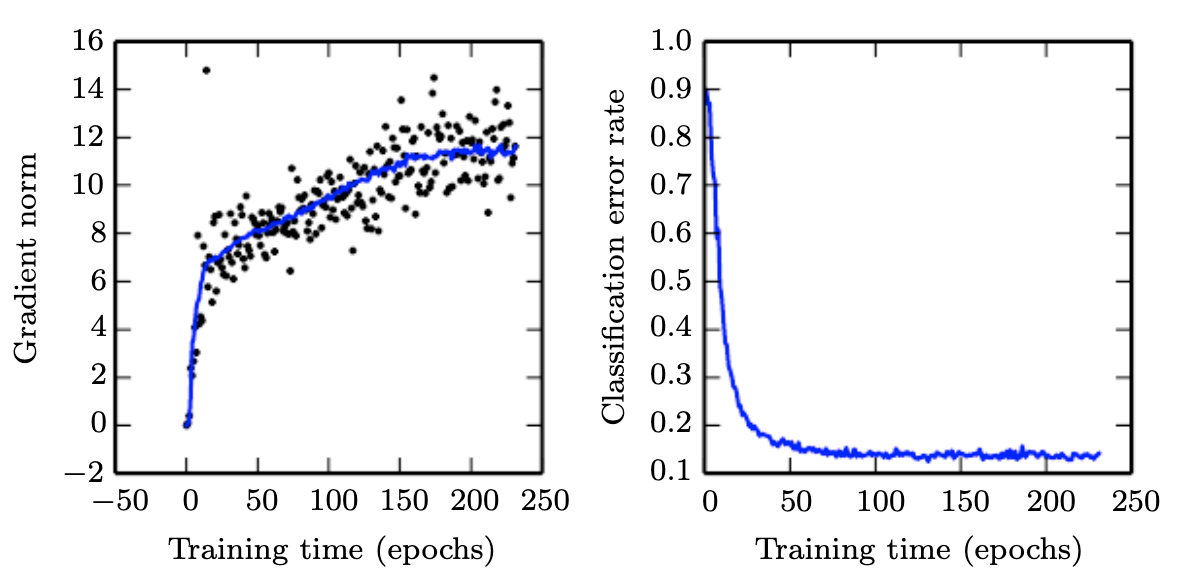

- Newton’s method is an excellent tool for minimizing convex functions with poorly conditioned Hessian matrices

#### 8.2.2 Local Minima

- Some convex functions have a flat region at the bottom rather than a single global minimum point...
    - When optimizing a convex function, we know that we have reached a good solution if we find a critical point of any kind.
    
- With non-convex functions, such as neural nets, it is possible to have **many** local minima.
    - any deep model - an **extremely** large number of local minima

$\implies$ model identifiability problem

- Local minima can be problematic if they have high cost in comparison to the global minimum.

NOWADAYS:
- for sufficiently large neural networks, **most local minima have a low cost function value**, and that it is not important to find a true global minimum rather than to find a point in parameter space that has low but not minimal cost

- even we can think the problem is the local minima it can be the one of gradient norm is increasing

#### 8.2.3 Plateaus, Saddle Points and Other Flat Regions

- Hessian matrix at a local minimum has only positive eigenvalues. (good) 

PROBLEM: The Hessian matrix at a saddle point has a mixture of positive and negative eigenvalues

- For first-order optimization algorithms that use only gradient information, the situation is unclear.
    - On the other hand, gradient descent empirically seems to be able to escape saddle points in many cases.

Image: Saddle point escape but a long time in plateau situation.

<img src="saddlepointescape-then-plateau.png" width="600" />
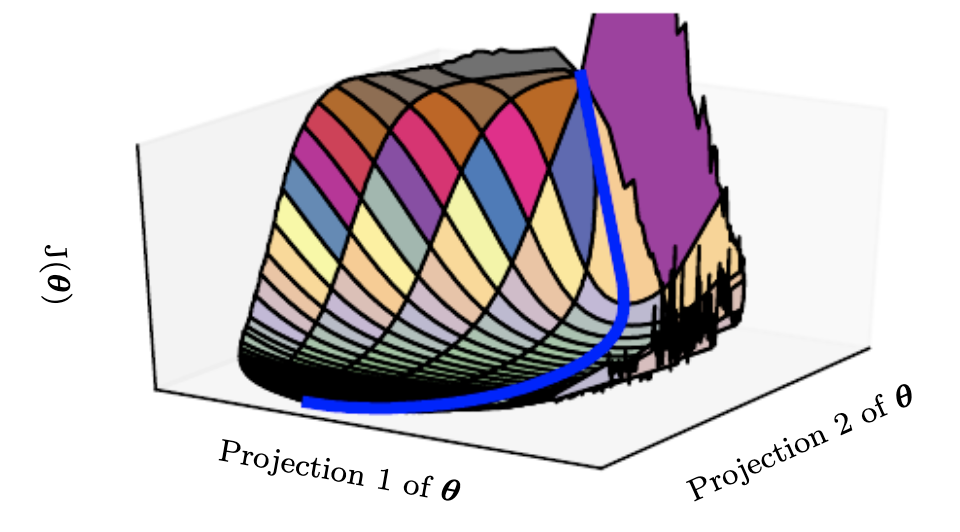

#### 8.2.4 Cliffs and Exploding Gradients

- solution is Gradient clipping
    - When the traditional gradient descent algorithm **proposes to make a very large step**, the gradient clipping heuristic **intervenes to reduce the step size to be small enough** that it is less likely to go outside the region, where the gradient indicates the direction of approximately steepest descent

<img src="cliffs.png" width="600" />
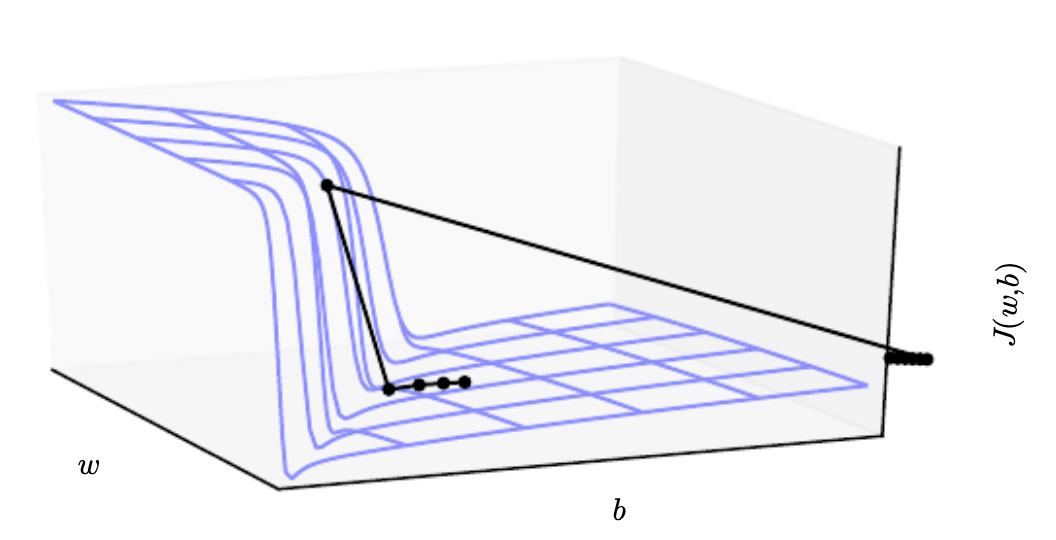

#### 8.2.5 Long-Term Dependencies

- when the computational graph becomes extremely deep
- repeatedly applying the same operation at each time step of a long temporal sequence

#### 8.2.6 Inexact Gradients

- deep learning algorithm relies on sampling-based estimates $\implies$

    - having noisy and inexact gradient or Hessian matrix

Solution: One can also avoid the problem by choosing a surrogate loss function that is easier to approximate than the true loss

#### 8.2.7 Poor Correspondence between Local and Global Structure

- much of the runtime of training is due to the length of the trajectory needed to arrive at the solution

- local descent may or may not define a reasonably short path to a valid solution

<img src="localglobal.png" width="500" />

#### 8.2.8 Theoretical Limits of Optimization

- finding a solution for a network of a given size is intractable, but in practice we can find a solution easily by using a larger network for which many more parameter settings correspond to an acceptable solution

### 8.3 Basic Algorithms

MFF Straka slides (recap)

**Gradient descent variants**

1) (Regular) Gradient Descent

- all training data to compute $J(\theta)$

2) Online (or Stochastic) Gradient Descent

- we estimate the expectation in $J(\theta)$ using a single randomple sampled example from training data
- randomly chosen $(x,y)$ from $\hat{p}_{data}$

3) Minibatch SGD

- trade-off between GD and SGD
- randomly chosen $(x^{(i)},y^{(i)})$ from $\hat{p}_{data}$

IMG: Loss with and without connections

<img src="gradientwithwithout.png" width="600px" />

#### 8.3.1 Stochastic Gradient Descent (SGD)

- the insight = the gradient is **an expectation**
- stochastic ~ using a small set of samples

- on each step of the algorithm, we can sample a minibatch of examples
    - $\mathbb{B} = \{x^{(1)} , ... , x^{(m')}\}$ - drawn uniformly form the training set 
    
- the estimate of the gradient is formed as

$$ \mathbf{g} = \frac{1}{m'} \nabla _\theta \sum_{i=1}^{m'} L( \mathbf{x} ^{(i)}, y^{(i)}, \mathbf{\theta} )  $$

- using examples from the minibatch $\mathbb{B}. Then the SGD algo follows the estimated gradient downhill

$$ \theta \leftarrow \theta - \varepsilon g $$

where $\varepsilon$ is the learning rate.

<img src="sgd.png" width="700px" />

#### 8.3.2 Momentum (SGD with momentum)


<img src="momentum.png" width="700px" />

#### 8.3.3 Nesterov Momentum (SGD with momentum and a correction factor)

<img src="nestorov.png" width="700px" />

### 8.4 Parameter Initialization Strategies

- (+) The initial point can determine whether the algorithm converges at all, with some initial points being so unstable that the algorithm encounters numerical difficulties and fails altogether.

- (-) Designing improved initialization strategies is a difficult task because neural network optimization is not yet well understood.

- (+/-) (carefully) Perhaps the only property known with complete certainty is that the initial parameters need to “break symmetry” between different units.
    - For example, if we have at most as many outputs as inputs, we could use Gram-Schmidt orthogonalization on an initial weight matrix, and be guaranteed that each unit computes a very different function from each other unit.

- (+) We almost always initialize all the weights in the model to values drawn randomly from a Gaussian or uniform distribution.

HOW-TO:
- One heuristic is to initialize the weights of a fully connected layer with m inputs and n outputs by sampling each weight from U (− √1/m, √1/m )

- Saxe et al. (2013) recommend initializing to random orthogonal matrices, with a carefully chosen scaling or gain factor g that accounts for the nonlinearity applied at each layer. 

### 8.5 Algorithms with Adaptive Learning Rates

- second part